# Multiple linear regression

Multiple linear regression is a statistical technique used to understand the relationship between two or more predictor variables and a single outcome variable. It assumes a linear relationship between the predictors and the outcome.

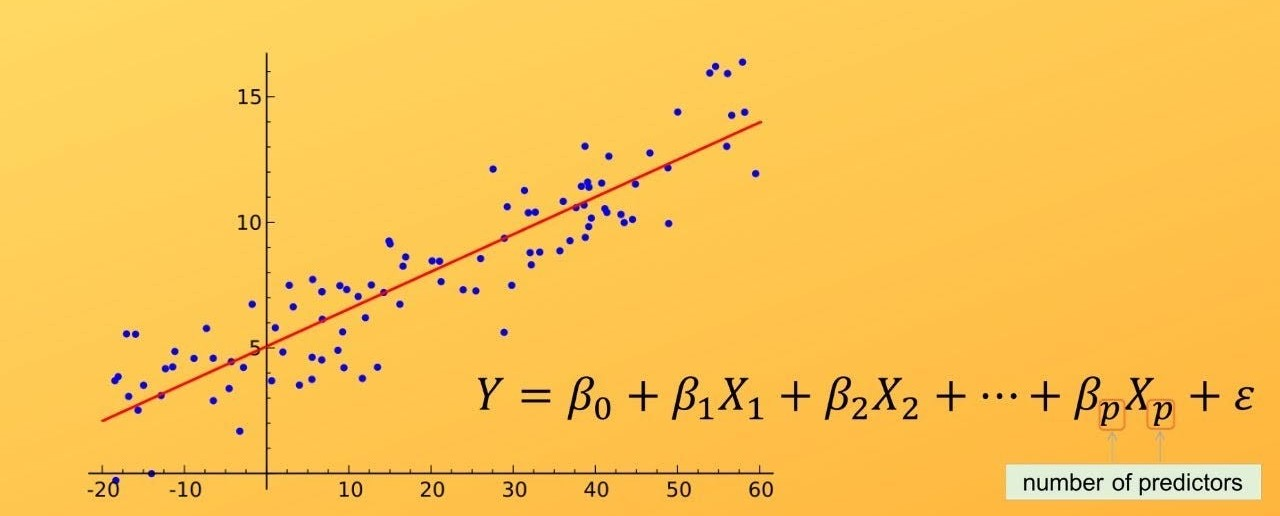

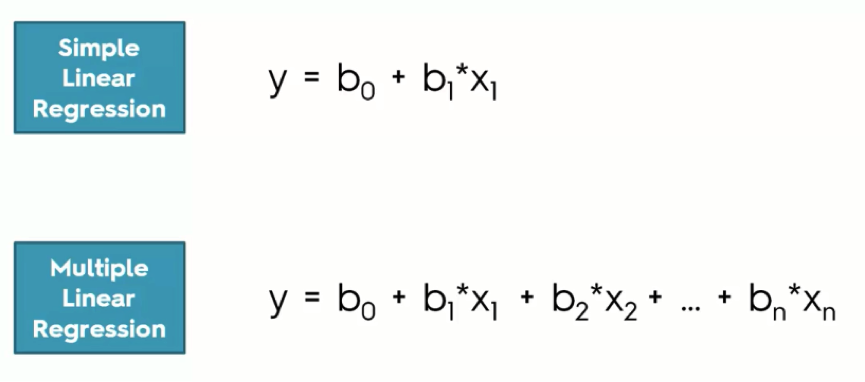

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go



In [2]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [3]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [4]:
df

,feature1,feature2,target
0,-0.626373,-0.010380,8.325735
1,1.467137,0.451579,20.771798
2,-0.316308,-2.013929,-244.147605
3,0.586145,-0.807061,-160.241223
4,0.192999,0.357864,14.026221
...,...,...,...
95,-0.068360,0.326273,30.463053
96,0.109935,-2.575658,-222.238371
97,1.750112,-0.957958,-9.362023
98,-0.518828,-2.076381,-266.204953


In [5]:
df.shape

(100, 3)

In [6]:
df.head()

,feature1,feature2,target
0,-0.626373,-0.010380,8.325735
1,1.467137,0.451579,20.771798
2,-0.316308,-2.013929,-244.147605
3,0.586145,-0.807061,-160.241223
4,0.192999,0.357864,14.026221


In [ ]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test[0]

array([ 0.14633696, -0.10424438])

In [12]:
y_pred = lr.predict(X_test)

In [13]:
y_pred[0]

-10.512360822233363

In [14]:
import numpy as np

# Assuming lr is your trained model

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

z_final = lr.predict(final).reshape(10, 10)

z = z_final


In [15]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [16]:
lr.coef_

array([  3.48202975, 102.2374698 ])

In [17]:
lr.intercept_

-0.3642290521059195

# Practical Example

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True)

In [5]:
diabetes_df = pd.DataFrame(X, columns=[
    'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'
])
diabetes_df['target'] = y

In [6]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train,y_train)#

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)

In [14]:
X_test[0]

array([ 0.06713621, -0.04464164,  0.00349435,  0.03564379,  0.0493413 ,
        0.03125356,  0.07072993, -0.03949338, -0.00061174,  0.01963284])

In [15]:
y_test[1]

233.0

In [16]:
y_pred[1]

204.81835117652142

In [31]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [32]:
reg.intercept_

151.88331005254167

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 45.213034190469024


In [19]:
print("MSE",mean_squared_error(y_test,y_pred))#error-->0.121

MSE 3094.4566715660626


In [20]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))#error-->0.34

RMSE 55.627840795469155


In [21]:
print("R2",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 0.4399338661568968
